<a href="https://colab.research.google.com/github/Aprilianiput21/TA_Model-ETp/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
data1 = pd.read_csv('/content/19-07-2023.csv', skiprows = 1)
data2 = pd.read_csv('/content/AWS_30-11-23.csv', skiprows = 1)
df = pd.concat([data1, data2], ignore_index=True)
df.head()

,#,"Date Time, GMT+08:00","Solar Radiation, W/m² (LGR S/N: 21533915, SEN S/N: 21281112, LBL: solar)","Wind Speed, m/s (LGR S/N: 21533915, SEN S/N: 21487882)","Gust Speed, m/s (LGR S/N: 21533915, SEN S/N: 21487882)","Wind Direction, ø (LGR S/N: 21533915, SEN S/N: 21487882)","Temp, °C (LGR S/N: 21533915, SEN S/N: 21501590)","RH, % (LGR S/N: 21533915, SEN S/N: 21501590)","Rain, mm (LGR S/N: 21533915, SEN S/N: 21506884)"
0,1,05/18/23 03:00:02 PM,80.6,0.0,1.00,286.4,28.110,76.580,NaN
1,2,05/18/23 04:00:02 PM,86.9,0.0,1.34,283.6,26.566,84.421,1.2
2,3,05/18/23 05:00:02 PM,20.6,0.0,0.67,283.6,25.923,87.114,0.2
3,4,05/18/23 06:00:02 PM,4.4,0.0,1.34,283.6,25.622,88.711,0.0
4,5,05/18/23 07:00:02 PM,0.6,0.0,0.00,283.6,24.464,92.364,0.0


In [25]:
#Delete useless columns
delete_columns = ['#', 'Gust Speed, m/s (LGR S/N: 21533915, SEN S/N: 21487882)', 'Wind Direction, ø (LGR S/N: 21533915, SEN S/N: 21487882)', 'Rain, mm (LGR S/N: 21533915, SEN S/N: 21506884)']
df= df.drop(columns = delete_columns)

In [26]:
#Rename columns
df = df.rename(columns = { 'Date Time, GMT+08:00' : "Date Time", 'Solar Radiation, W/m² (LGR S/N: 21533915, SEN S/N: 21281112, LBL: solar)' : "Rs, W/m²", 'Wind Speed, m/s (LGR S/N: 21533915, SEN S/N: 21487882)' : "u, m/s", 'Temp, °C (LGR S/N: 21533915, SEN S/N: 21501590)' : "T, °C", 'RH, % (LGR S/N: 21533915, SEN S/N: 21501590)' : "RH, %"})
df.head()

,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %"
0,05/18/23 03:00:02 PM,80.6,0.0,28.110,76.580
1,05/18/23 04:00:02 PM,86.9,0.0,26.566,84.421
2,05/18/23 05:00:02 PM,20.6,0.0,25.923,87.114
3,05/18/23 06:00:02 PM,4.4,0.0,25.622,88.711
4,05/18/23 07:00:02 PM,0.6,0.0,24.464,92.364


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date Time  4700 non-null   object 
 1   Rs, W/m²   4700 non-null   float64
 2   u, m/s     4700 non-null   float64
 3   T, °C      4700 non-null   float64
 4   RH, %      4700 non-null   float64
dtypes: float64(4), object(1)
memory usage: 183.7+ KB


In [33]:
df.replace(0.0, np.nan , inplace = True)
df.head()

,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %"
0,05/18/23 03:00:02 PM,80.6,NaN,28.110,76.580
1,05/18/23 04:00:02 PM,86.9,NaN,26.566,84.421
2,05/18/23 05:00:02 PM,20.6,NaN,25.923,87.114
3,05/18/23 06:00:02 PM,4.4,NaN,25.622,88.711
4,05/18/23 07:00:02 PM,0.6,NaN,24.464,92.364


In [35]:
missing_data = df.isnull()
missing_data.head()

#Output
#True meansthe value is a missing value
#False means the value is not missing value

,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %"
0,False,False,True,False,False
1,False,False,True,False,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,True,False,False


In [36]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print("")


Date Time
False    4700
Name: Date Time, dtype: int64

Rs, W/m²
False    4700
Name: Rs, W/m², dtype: int64

u, m/s
False    2668
True     2032
Name: u, m/s, dtype: int64

T, °C
False    4700
Name: T, °C, dtype: int64

RH, %
False    4700
Name: RH, %, dtype: int64



In [38]:
df['u, m/s'].replace(np.nan, 0.2, inplace=True)
df.head()

,Date Time,"Rs, W/m²","u, m/s","T, °C","RH, %"
0,05/18/23 03:00:02 PM,80.6,0.2,28.110,76.580
1,05/18/23 04:00:02 PM,86.9,0.2,26.566,84.421
2,05/18/23 05:00:02 PM,20.6,0.2,25.923,87.114
3,05/18/23 06:00:02 PM,4.4,0.2,25.622,88.711
4,05/18/23 07:00:02 PM,0.6,0.2,24.464,92.364


In [39]:
df.describe()

,"Rs, W/m²","u, m/s","T, °C","RH, %"
count,4700.000000,4700.000000,4700.000000,4700.000000
mean,189.018021,0.366802,26.262026,80.842039
std,297.605226,0.203937,3.627231,12.276664
min,0.600000,0.200000,19.124000,39.576000
25%,0.600000,0.200000,23.413000,70.107500
50%,4.400000,0.330000,25.494000,85.497000
75%,255.600000,0.670000,29.226000,90.936000
max,1251.900000,1.340000,35.789000,99.261000


In [40]:
import seaborn as sns

(18.255128700865466, 37.370297281825174)

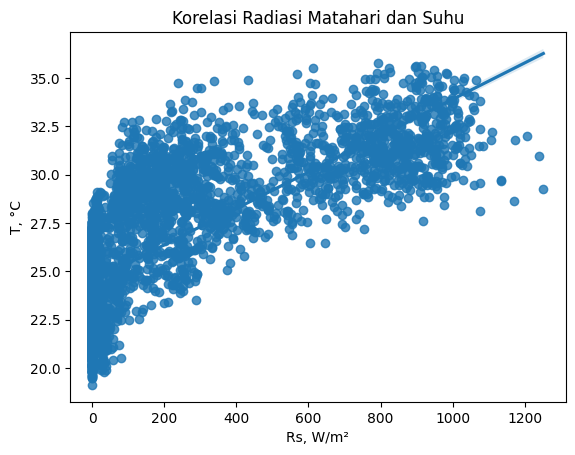

In [54]:
sns.regplot(x= 'Rs, W/m²', y = 'T, °C', data= df).set_title("Korelasi Radiasi Matahari dan Suhu")
plt.ylim()



(18.217279567495048, 38.165129082603954)

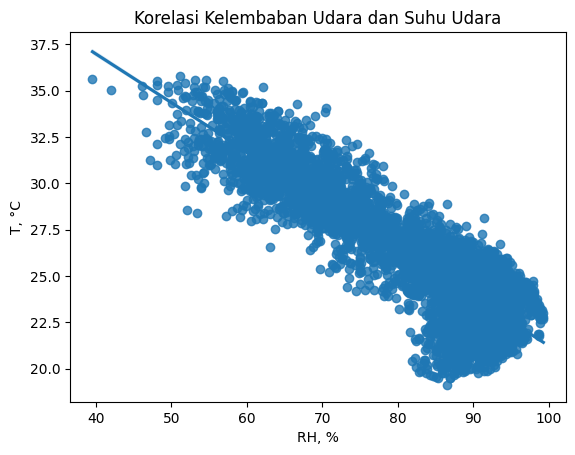

In [55]:
sns.regplot(x= 'RH, %', y = 'T, °C', data= df).set_title("Korelasi Kelembaban Udara dan Suhu Udara")
plt.ylim()

(-236.8391333952667, 1322.792339685489)

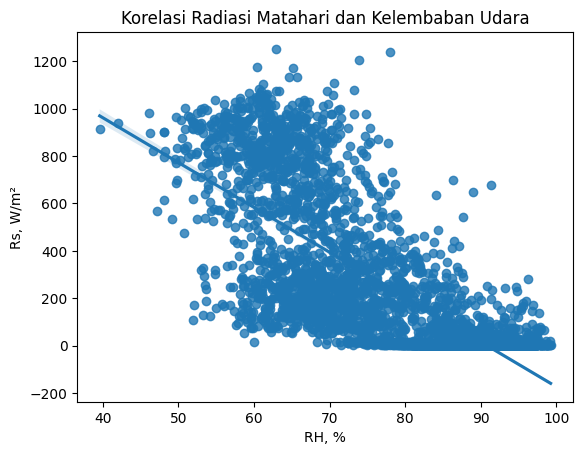

In [56]:
sns.regplot(x= 'RH, %', y = 'Rs, W/m²', data= df).set_title("Korelasi Radiasi Matahari dan Kelembaban Udara")
plt.ylim()

Text(0, 0.5, 'RH, %')

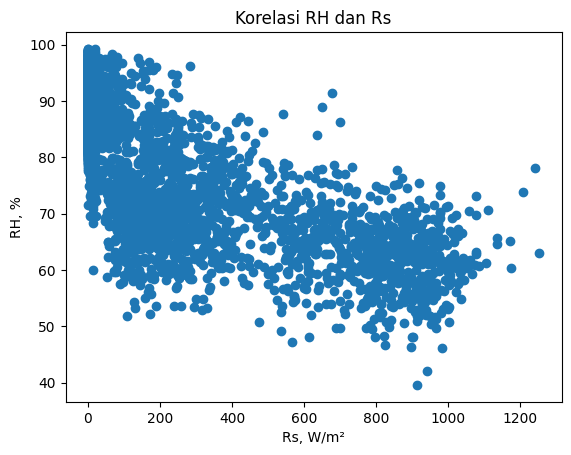

In [52]:
y = df['RH, %']
x = df['Rs, W/m²']
plt.scatter(x,y)

plt.title("Korelasi RH dan Rs")
plt.xlabel('Rs, W/m²')
plt.ylabel('RH, %')